In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from matplotlib import pyplot as plt
import xarray as xr
import netCDF4 as nc
import datetimecd 
from RoutePlanner.TemporalCellGrid import TemporalCellGrid
import matplotlib.pyplot as plt
from RoutePlanner.CellBox import CellBox
import math

In [3]:
import json
config = ""
with open('resources/configs/Modis_testing.json', 'r') as f:
    config = json.load(f)

In [4]:
modis_grid = CellGrid(config)

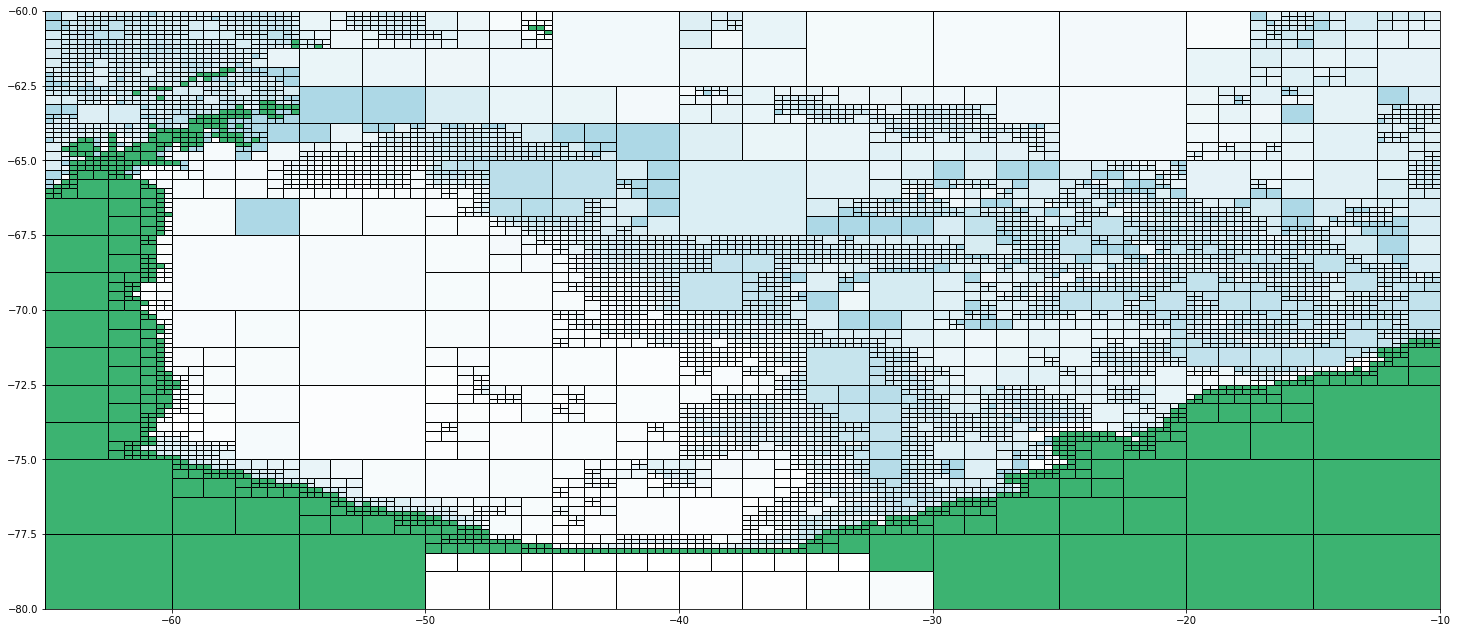

In [5]:
modis_grid.plot()

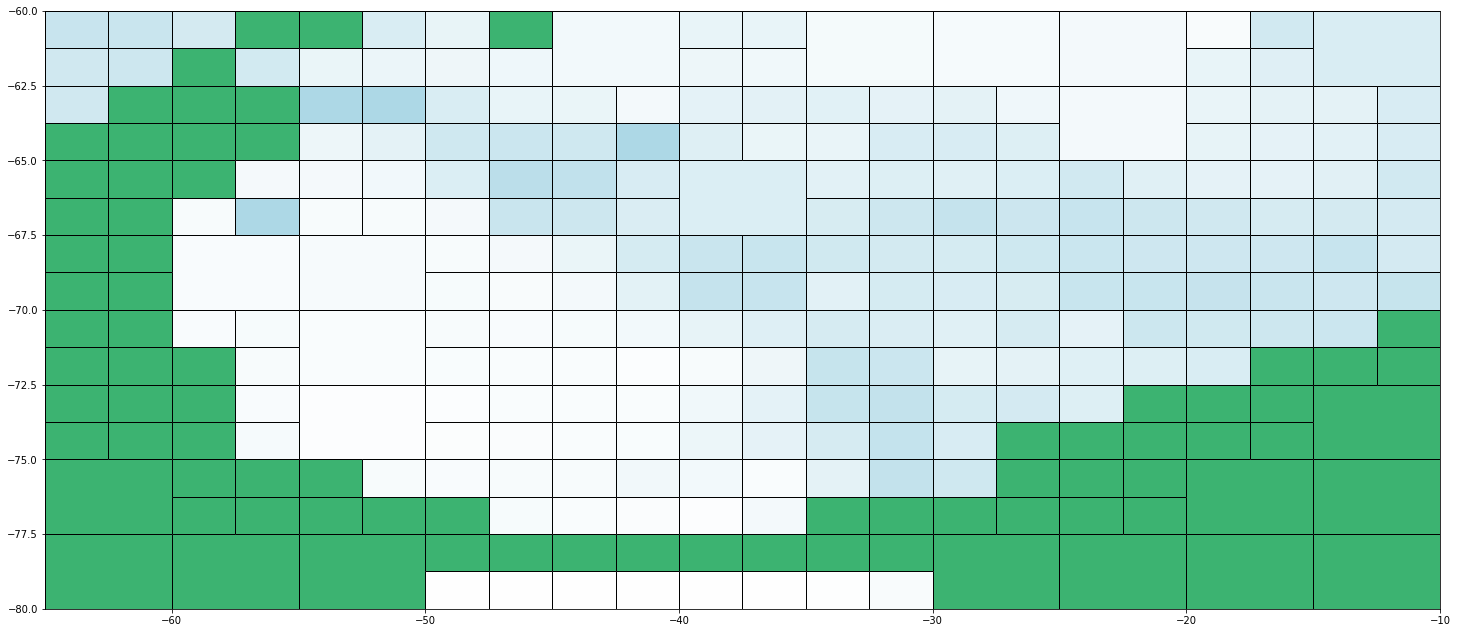

In [7]:
splittingPercentage = 0.35 # thershold
splitMinProp = 0.3 # lowerbound
splitMaxProp = 1.0 # upperbound

modis_grid.iterativeSplit(1, splittingPercentage, splitMinProp, splitMaxProp)
modis_grid.plot()

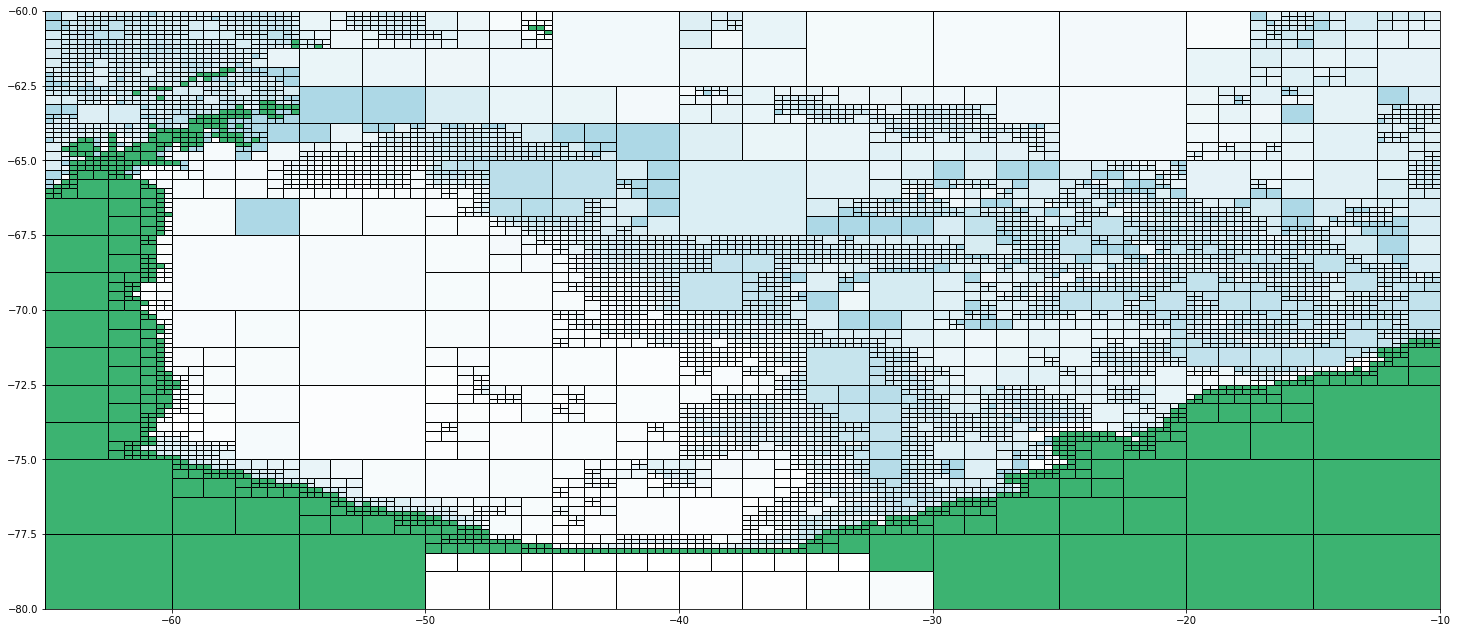

In [8]:

modis_grid.iterativeSplit(3, splittingPercentage, splitMinProp, splitMaxProp)
modis_grid.plot()

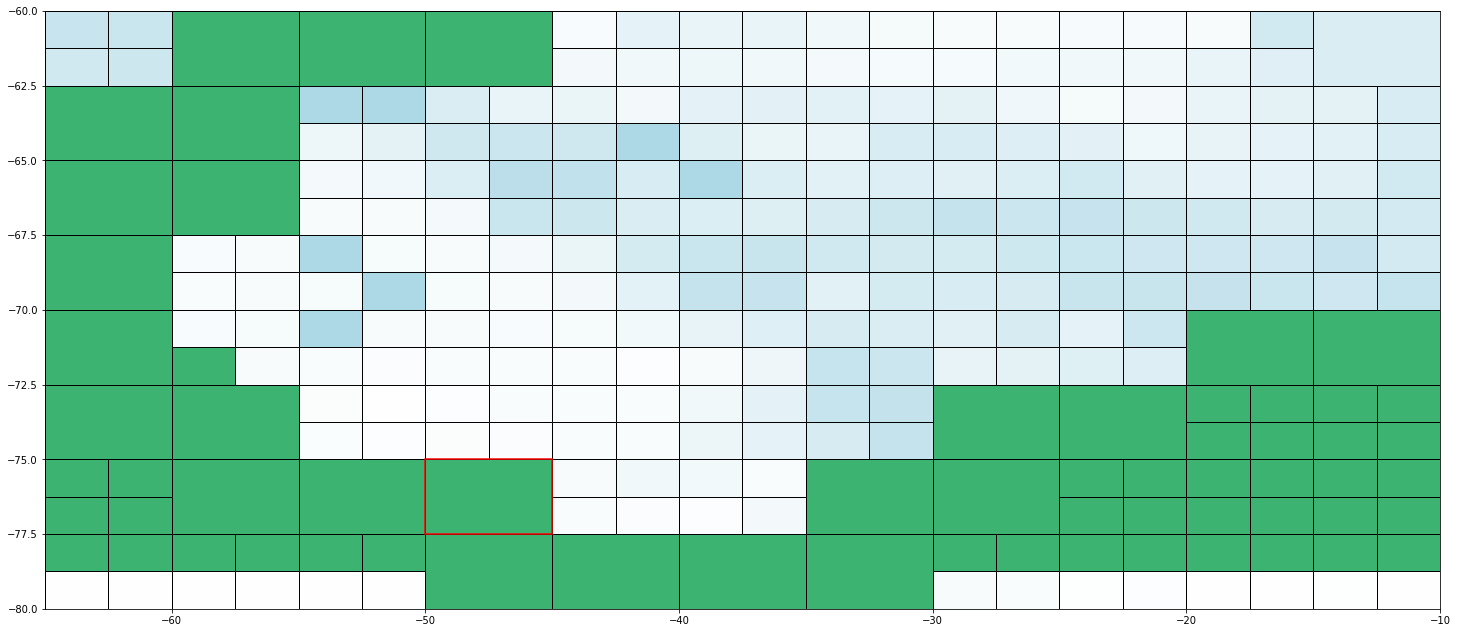

In [8]:
cellBox = modis_grid.getCellBox(-49, -77)[0]
modis_grid.plot(highlightCellBoxes = {'red': [cellBox]})

In [10]:
depthPoints = cellBox.getDataPoints(['depth'])

propOver = depthPoints.loc[depthPoints['depth'] > -10]
print(propOver)


           lat       long time  depth
0   -77.487030 -49.916656  NaT   -0.0
1   -77.487030 -49.750000  NaT   -0.0
2   -77.487030 -49.583313  NaT   -0.0
3   -77.487030 -49.416656  NaT   -0.0
4   -77.487030 -49.250000  NaT   -0.0
..         ...        ...  ...    ...
420 -76.971313 -49.916656  NaT   -0.0
421 -76.971313 -49.750000  NaT   -0.0
422 -76.971313 -49.583313  NaT   -0.0
450 -76.933685 -49.916656  NaT   -0.0
480 -76.895950 -49.916656  NaT   -0.0

[138 rows x 4 columns]


In [64]:
threshold = 0.8 
cellsOverThershold = []
for cellBox in modis_grid.cellBoxes:
    if isinstance(cellBox, CellBox):
        if cellBox.iceArea() > threshold:
            cellsOverThershold.append(cellBox)

print(len(cellsOverThershold))


1593


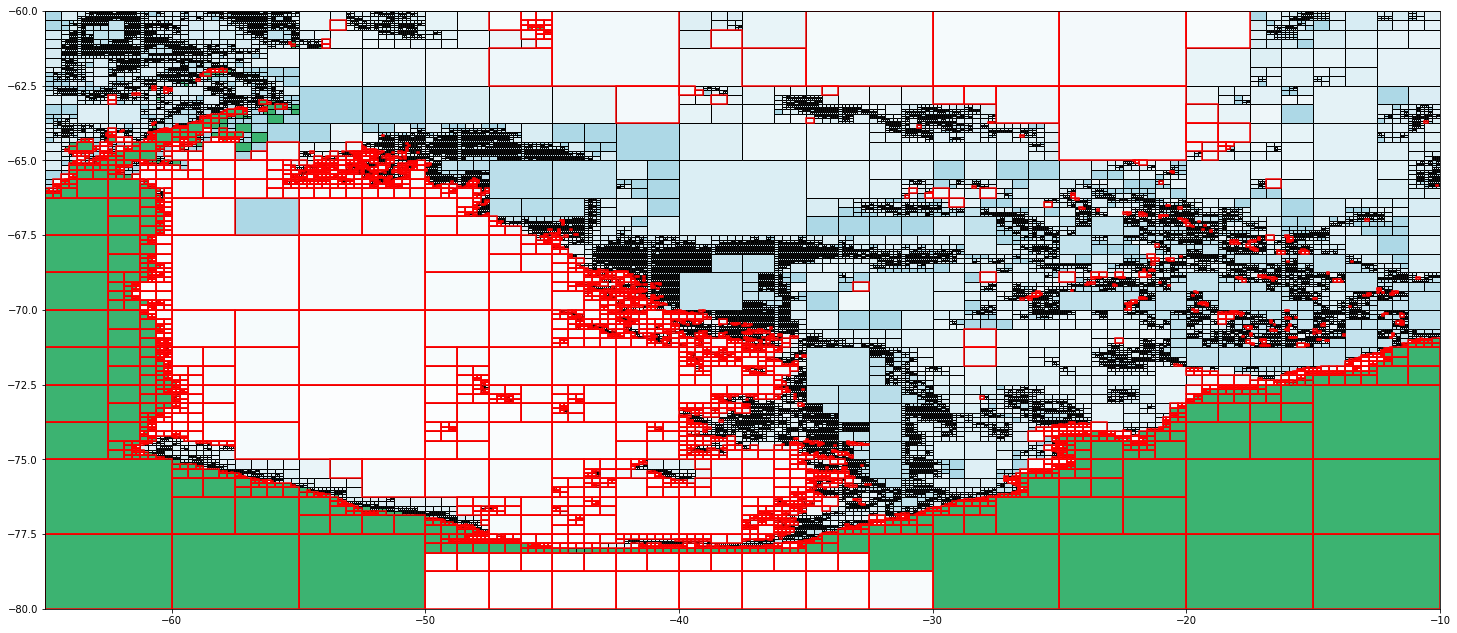

In [61]:
modis_grid.plot(highlightCellBoxes = {"red":cellsOverThershold})

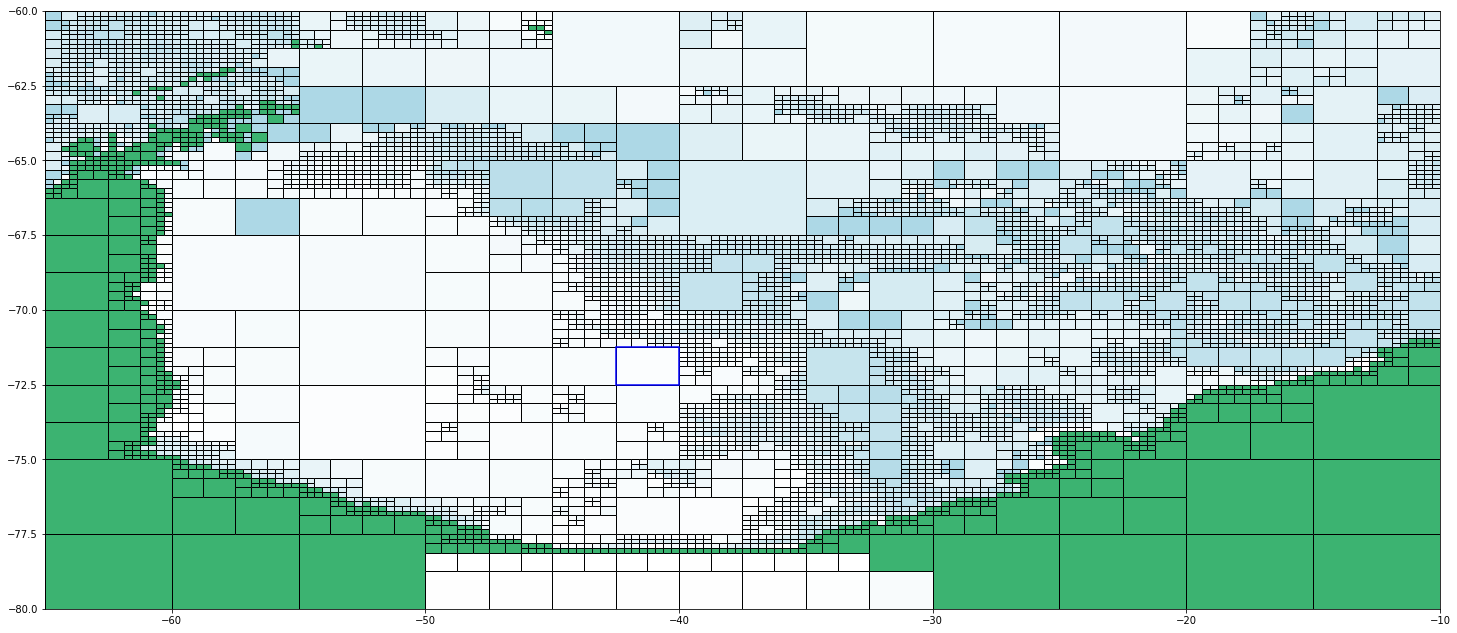

In [39]:
cellBox = modis_grid.getCellBox(-41, -72)[0]
modis_grid.plot(highlightCellBoxes = {"blue": [cellBox]})

In [43]:
selected = ['v10']

dataFrame = cellBox.getDataPoints(values = selected)

print(dataFrame)

          lat   long                 time       v10
199196 -71.25 -42.25  2017-02-01 00:00:00  3.137204
199197 -71.50 -42.25  2017-02-01 00:00:00  3.159404
199198 -71.75 -42.25  2017-02-01 00:00:00  3.144141
199199 -72.00 -42.25  2017-02-01 00:00:00  3.127954
199200 -72.25 -42.25  2017-02-01 00:00:00  3.090492
199557 -71.25 -42.00  2017-02-01 00:00:00  3.120091
199558 -71.50 -42.00  2017-02-01 00:00:00  3.144604
199559 -71.75 -42.00  2017-02-01 00:00:00  3.140904
199560 -72.00 -42.00  2017-02-01 00:00:00  3.128879
199561 -72.25 -42.00  2017-02-01 00:00:00  3.082629
199918 -71.25 -41.75  2017-02-01 00:00:00  3.103441
199919 -71.50 -41.75  2017-02-01 00:00:00  3.129804
199920 -71.75 -41.75  2017-02-01 00:00:00  3.133966
199921 -72.00 -41.75  2017-02-01 00:00:00  3.130267
199922 -72.25 -41.75  2017-02-01 00:00:00  3.083554
200279 -71.25 -41.50  2017-02-01 00:00:00  3.085866
200280 -71.50 -41.50  2017-02-01 00:00:00  3.114079
200281 -71.75 -41.50  2017-02-01 00:00:00  3.117779
200282 -72.0

In [48]:
print(cellBox.getValue('u10'))

2.8802476


In [13]:
print(dataFrame['iceArea'].mean())

0.9627529260067449


In [65]:
minimum_ips_km2 = 0.2

cellBoxes_under_minimum = []

for cellBox in modis_grid.cellBoxes:
    if isinstance(cellBox, CellBox):
        icePoints = cellBox.getDataPoints().dropna(subset = ['iceArea'])
        
        cellBoxHeightKm = cellBox.height * 110.574
        cellBoxWidthKm = cellBox.width * 111.320 * math.cos(math.radians(cellBox.lat + (0.5 * cellBox.height)))
        cellBoxAreaKm = cellBoxHeightKm * cellBoxWidthKm
        
        ips_per_km2 = icePoints.shape[0] / cellBoxAreaKm
        
        if ips_per_km2 < minimum_ips_km2:
            cellBoxes_under_minimum.append(cellBox)
            
print(len(cellBoxes_under_minimum))

1120


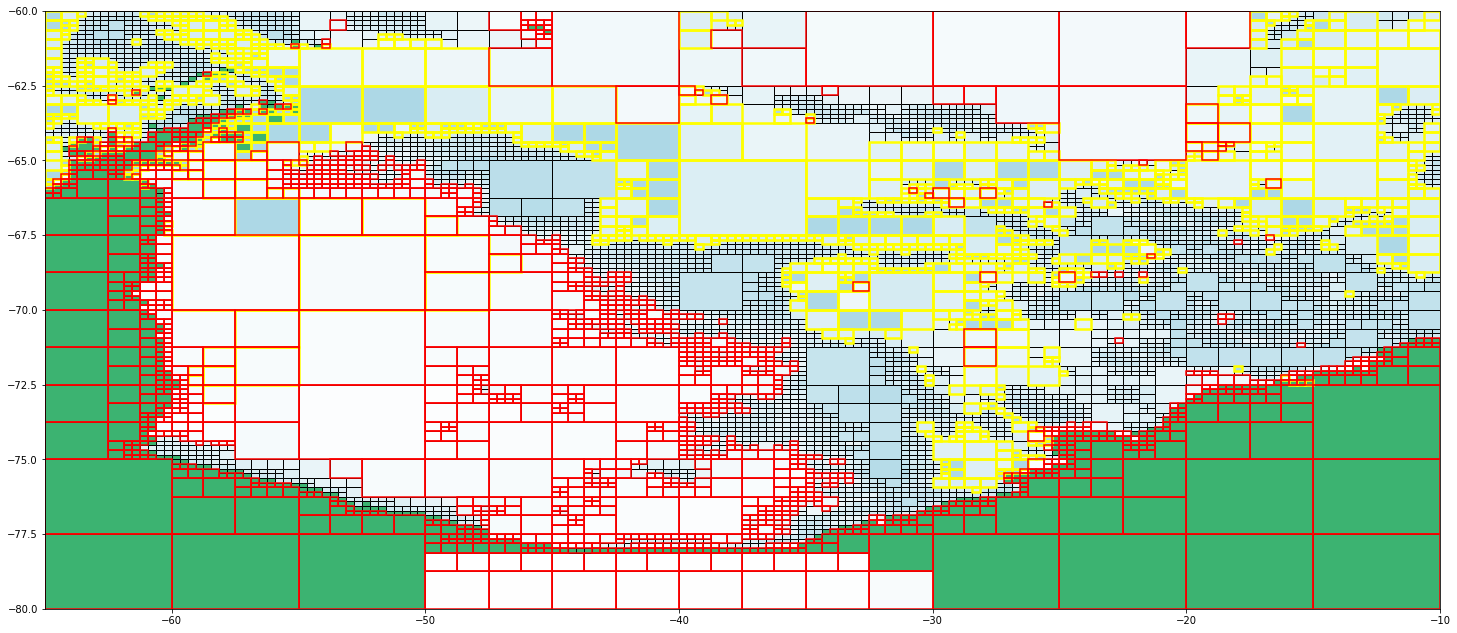

In [67]:
modis_grid.plot(highlightCellBoxes = {"yellow":cellBoxes_under_minimum, 
                                    "red":cellsOverThershold})

In [70]:
# l3 = [x for x in l1 if x not in l2]

cells = [x for x in cellsOverThershold if x not in cellBoxes_under_minimum]
print(len(cells))

1497


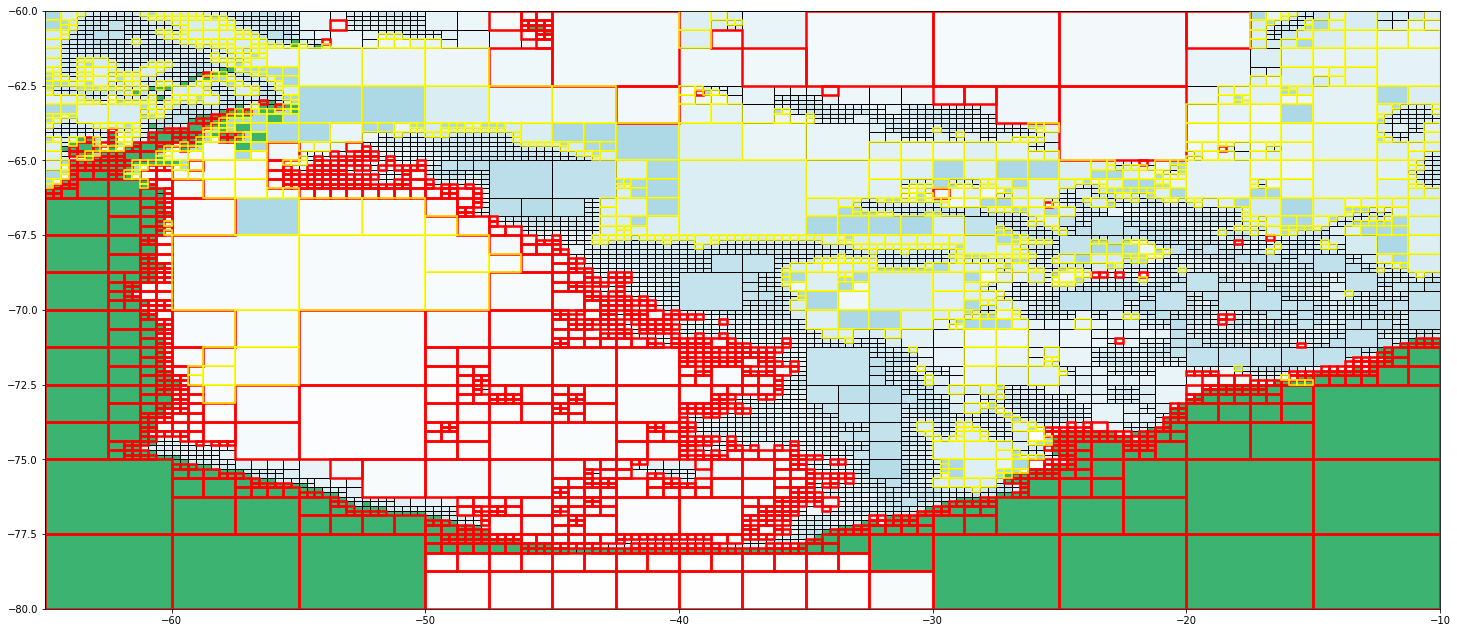

In [73]:
modis_grid.plot(highlightCellBoxes = {"red":cells, 
                                    "yellow":cellBoxes_under_minimum})